In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from imblearn.over_sampling import SMOTE
import numpy as np
import joblib
from tensorflow.keras.models import load_model

In [10]:
# Load CSV file
df = pd.read_csv('C:/Git_Repos/POSDV_Streamlit/cardiotocography/raw_data.CSV', delimiter=';')
df.head()

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Variab10.txt,01.12.1996,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,Fmcs_1.txt,03.05.1996,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,03.05.1996,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,03.05.1996,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0


In [11]:
# clean data
# Extract relevant columns
columns = [
    'LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 
    'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 
    'Variance', 'Tendency', 'NSP'
]

# Filter the dataset to include only these columns
data_filtered = df[columns]

data_filtered.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,120.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
2,132.0,4.0,0.0,4.0,2.0,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
3,133.0,2.0,0.0,5.0,2.0,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
4,134.0,2.0,0.0,6.0,2.0,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0


In [12]:
# Drop rows with missing values
data_filtered = data_filtered.dropna()

# Separate features and target
X = data_filtered.drop('NSP', axis=1)
y = data_filtered['NSP']

# Display the first few rows of the filtered data
data_filtered.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
1,120.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
2,132.0,4.0,0.0,4.0,2.0,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
3,133.0,2.0,0.0,5.0,2.0,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
4,134.0,2.0,0.0,6.0,2.0,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
5,132.0,4.0,0.0,5.0,0.0,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


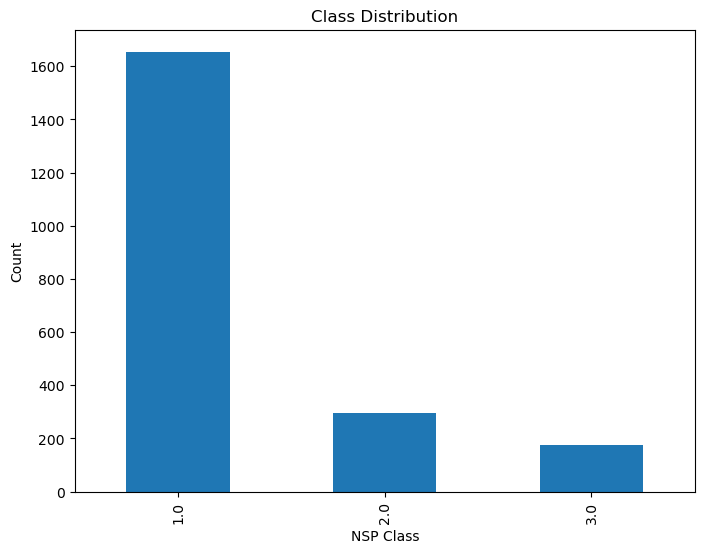

In [13]:
import matplotlib.pyplot as plt

# Plot class distribution
plt.figure(figsize=(8, 6))
y.value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('NSP Class')
plt.ylabel('Count')
plt.show()


      LB   AC   FM   UC   DL   DS   DP  ASTV  MSTV  ALTV  ...  Width   Min  \
1  120.0  0.0  0.0  0.0  0.0  0.0  0.0  73.0   0.5  43.0  ...   64.0  62.0   
2  132.0  4.0  0.0  4.0  2.0  0.0  0.0  17.0   2.1   0.0  ...  130.0  68.0   
3  133.0  2.0  0.0  5.0  2.0  0.0  0.0  16.0   2.1   0.0  ...  130.0  68.0   
4  134.0  2.0  0.0  6.0  2.0  0.0  0.0  16.0   2.4   0.0  ...  117.0  53.0   
5  132.0  4.0  0.0  5.0  0.0  0.0  0.0  16.0   2.4   0.0  ...  117.0  53.0   

     Max  Nmax  Nzeros   Mode   Mean  Median  Variance  Tendency  
1  126.0   2.0     0.0  120.0  137.0   121.0      73.0       1.0  
2  198.0   6.0     1.0  141.0  136.0   140.0      12.0       0.0  
3  198.0   5.0     1.0  141.0  135.0   138.0      13.0       0.0  
4  170.0  11.0     0.0  137.0  134.0   137.0      13.0       1.0  
5  170.0   9.0     0.0  137.0  136.0   138.0      11.0       1.0  

[5 rows x 21 columns]


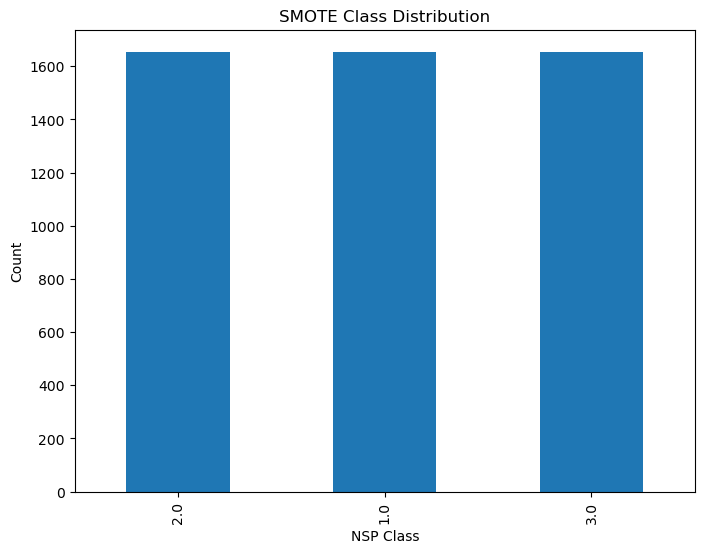

In [28]:
X = data_filtered.drop('NSP', axis=1)
y = data_filtered['NSP']
print(X.head())
# Apply SMOTE to balance the classes
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Display SMOTEd class distribution
plt.figure(figsize=(8, 6))
y_resampled.value_counts().plot(kind='bar')
plt.title('SMOTE Class Distribution')
plt.xlabel('NSP Class')
plt.ylabel('Count')
plt.show()

Class weights: {0: 1.0168970814132103, 1: 0.9895366218236173, 2: 0.993993993993994}
Epoch 1/100


c:\Users\noiri\.conda\envs\brain_tumor\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3560 - loss: 1.3290 - val_accuracy: 0.6692 - val_loss: 1.1256 - learning_rate: 0.0010
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4866 - loss: 1.1105 - val_accuracy: 0.7346 - val_loss: 0.9331 - learning_rate: 0.0010
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5769 - loss: 0.9597 - val_accuracy: 0.7849 - val_loss: 0.7339 - learning_rate: 0.0010
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6654 - loss: 0.8213 - val_accuracy: 0.8453 - val_loss: 0.6510 - learning_rate: 0.0010
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7453 - loss: 0.7289 - val_accuracy: 0.8553 - val_loss: 0.6007 - learning_rate: 0.0010
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7754 - loss: 0.6848 - val_accuracy: 0.8704 - val_loss: 0.5523 - learning_rate: 0.0010
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8053 - loss: 0.6245 - val_a

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_55 (Dense)                │ (None, 64)             │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,539 (48.98 KB)

 Trainable params: 4,179 (16.32 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,360 (32.66 KB)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9345 - loss: 0.2664 
Test Loss: 0.28492501378059387, Test Accuracy: 0.9284995198249817
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


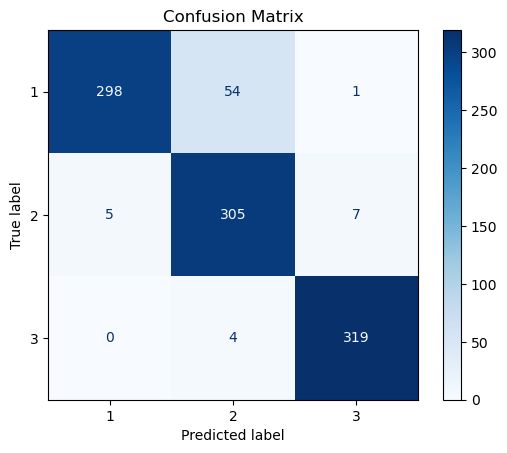

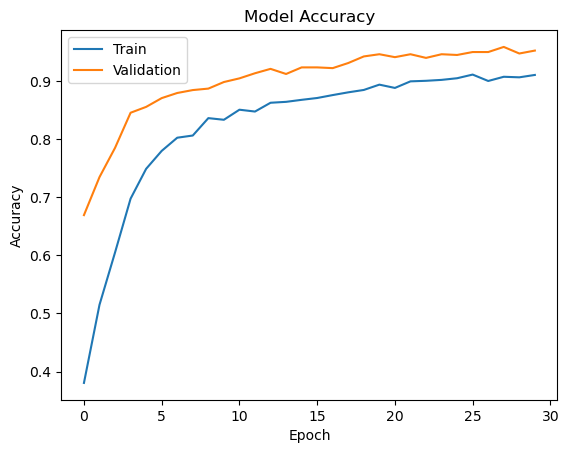

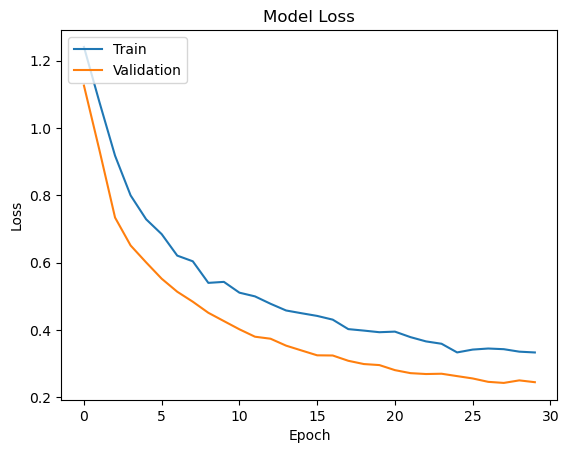

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step


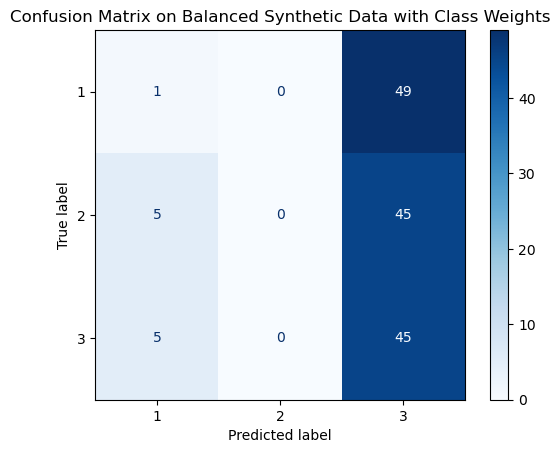

In [69]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
import tensorflow as tf
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Split the resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

# Convert target to categorical
y_train_categorical = tf.keras.utils.to_categorical(y_train - 1, num_classes=3)
y_test_categorical = tf.keras.utils.to_categorical(y_test - 1, num_classes=3)

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# Print class weights
print(f"Class weights: {class_weights_dict}")

# Define the learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 50:
        return lr
    else:
        return float(lr * tf.math.exp(-0.1))

callback = LearningRateScheduler(scheduler)
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Define the neural network model with dropout layers and L2 regularization
model = Sequential([
    Dense(64, input_dim=X_train_scaled.shape[1], activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(16, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(8, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with class weights
history = model.fit(X_train_scaled, y_train_categorical, epochs=100, validation_split=0.2, batch_size=32, verbose=1, callbacks=[callback, early_stopping], class_weight=class_weights_dict)

# Display the model summary
model.summary()

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test_categorical)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1) + 1  # Convert to original class labels
y_true_classes = np.argmax(y_test_categorical, axis=1) + 1  # Convert to original class labels

# Generate confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 2, 3])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Display accuracy and loss curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Make predictions on the synthetic data
y_pred_synthetic = model.predict(X_synthetic_scaled)
y_pred_synthetic_classes = np.argmax(y_pred_synthetic, axis=1) + 1  # Convert to original class labels

# Generate confusion matrix for synthetic data
cm_synthetic = confusion_matrix(y_synthetic, y_pred_synthetic_classes)

# Display confusion matrix for synthetic data
disp_synthetic = ConfusionMatrixDisplay(confusion_matrix=cm_synthetic, display_labels=[1, 2, 3])
disp_synthetic.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix on Balanced Synthetic Data with Class Weights')
plt.show()



In [70]:
# Save the entire model to a HDF5 file
model.save('nsp_model.h5')
model.save('nsp_model.keras')
print("Model saved to nsp_model.h5")


Model saved to nsp_model.h5


In [71]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler


# Generate balanced synthetic data
np.random.seed(42)
num_samples_per_class = 50  # Ensure balanced classes
data = {
    'LB': np.random.uniform(120, 140, num_samples_per_class * 3),
    'AC': np.random.uniform(0, 10, num_samples_per_class * 3),
    'FM': np.random.uniform(0, 1, num_samples_per_class * 3),
    'UC': np.random.uniform(0, 2, num_samples_per_class * 3),
    'DL': np.random.uniform(0, 2, num_samples_per_class * 3),
    'DS': np.random.uniform(0, 1, num_samples_per_class * 3),
    'DP': np.random.uniform(0, 2, num_samples_per_class * 3),
    'ASTV': np.random.uniform(0, 100, num_samples_per_class * 3),
    'MSTV': np.random.uniform(0, 3, num_samples_per_class * 3),
    'ALTV': np.random.uniform(0, 100, num_samples_per_class * 3),
    'MLTV': np.random.uniform(0, 5, num_samples_per_class * 3),
    'Width': np.random.uniform(0, 5, num_samples_per_class * 3),
    'Min': np.random.uniform(0, 100, num_samples_per_class * 3),
    'Max': np.random.uniform(0, 200, num_samples_per_class * 3),
    'Nmax': np.random.uniform(0, 10, num_samples_per_class * 3),
    'Nzeros': np.random.uniform(0, 5, num_samples_per_class * 3),
    'Mode': np.random.uniform(0, 150, num_samples_per_class * 3),
    'Mean': np.random.uniform(0, 150, num_samples_per_class * 3),
    'Median': np.random.uniform(0, 150, num_samples_per_class * 3),
    'Variance': np.random.uniform(0, 100, num_samples_per_class * 3),
    'Tendency': np.random.uniform(0, 2, num_samples_per_class * 3),
    'NSP': np.array([1]*num_samples_per_class + [2]*num_samples_per_class + [3]*num_samples_per_class)
}

synthetic_df = pd.DataFrame(data)



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


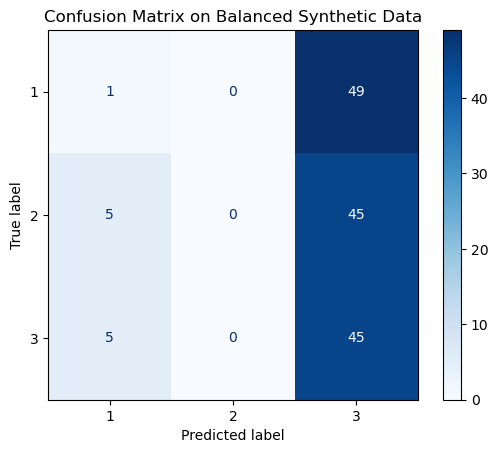

In [72]:
# Separate features and target
X_synthetic = synthetic_df.drop('NSP', axis=1)
y_synthetic = synthetic_df['NSP']

# Load the scaler
scaler = joblib.load('scaler.pkl')

# Preprocess the synthetic data using the scaler
X_synthetic_scaled = scaler.transform(X_synthetic)

# Load the trained model
model = load_model('nsp_model.h5')

# Make predictions on the synthetic data
y_pred = model.predict(X_synthetic_scaled)
y_pred_classes = np.argmax(y_pred, axis=1) + 1  # Convert to original class labels

# Generate confusion matrix
cm = confusion_matrix(y_synthetic, y_pred_classes)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 2, 3])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix on Balanced Synthetic Data')
plt.show()